# House Prices - Advanced Regression Techniques
соревнование на Kaggle

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import SVG
#from graphviz import Source
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



In [2]:
from typing import List, Union, Dict

In [3]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pycaret.regression import setup, compare_models
from pycaret import classification as clf

In [4]:
#увеличиваю отображение таблиц в ячейках вывода, чтобы показывало все данные
#pd.options.display.max_rows = 500
#pd.options.display.max_columns = 100

In [62]:
train_data = pd.read_csv('D:/Документы/Python/ML/трен/house-prices-advanced-regression-techniques/train.csv' )
test_data = pd.read_csv('D:/Документы/Python/ML/трен/house-prices-advanced-regression-techniques/test.csv')

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Описание данных
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

## Проверка и обработка

In [29]:
corr = train_data.corr()
corr.style.background_gradient()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [9]:
#выясню насколько корелируют данные(не зависимо от положительности или отрицательности влияний)
(train_data.corr()**2)['SalePrice'].sort_values(ascending = False)
#мультиколинеарность

SalePrice        1.000000
OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePr

In [31]:
#функция постройки графиков
def plotting_3_chart(df, feature):
    import seaborn as sns 
    import matplotlib.pyplot as plt 
    import matplotlib.gridspec as gridspec 
    from scipy import stats
    import matplotlib.style as style 
    style.use('fivethirtyeight')
    
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
     
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    #sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
    sns.histplot(data=df,x = feature, kde=True)
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    #sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    sns.boxplot(x=df[feature])

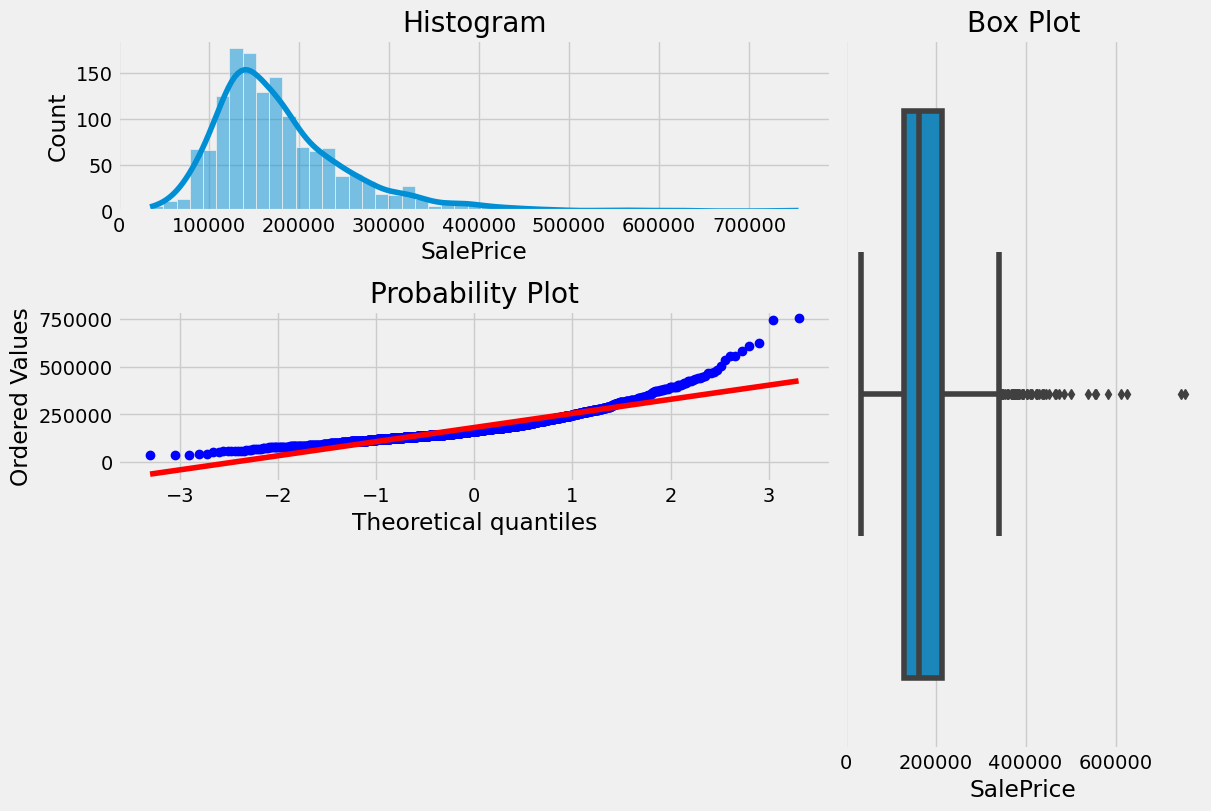

In [32]:
#построю графики 
plotting_3_chart(train_data, 'SalePrice') 
#пузатый график и присутствуют выбросы, вернусь к этому позже

In [12]:
#train_data.isna().sum() / train_data.shape[0]
#выявляю долю пропущенных значений

In [63]:
target = train_data['SalePrice']
train_data2 = train_data.drop(['Id','SalePrice'], axis = 1) 

#удаляю целевую переменную и id

In [14]:
#train_data2.select_dtypes(np.number).isna().sum()
#train_data2.select_dtypes('object').isna().sum()
#смотрю типы данных для дальнейшего заполнения пропусков

In [64]:
#test_data.isna().sum() / train_data.shape[0]
test_data2 = test_data.drop(['Id'], axis = 1)
test_ids = test_data['Id']
#тоже самое

In [65]:
#заполняю пропуски часто встречающимися значениями 
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    train_data2[column] = train_data2[column].fillna(train_data2[column].mode()[0])
    test_data2[column] = train_data2[column].fillna(train_data2[column].mode()[0])

In [66]:
#тут данные не отсутствуют, а в значении - нет (по документации)
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    train_data2[column] = train_data2[column].fillna("None")
    test_data2[column] = test_data2[column].fillna("None")

In [67]:
def numeric(df):
    numeric_df = df.select_dtypes(np.number)
    return numeric_df

    

In [68]:
def split_train_test(numeric_df, na_target):
    non_na_columns = numeric_df.loc[: , numeric_df.isna().sum() == 0].columns
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    return (y_train, X_train, X_test)

In [69]:
#функция заполнения для числовых значений, по принципу интерполяции к ближайшим 
knn = KNeighborsRegressor()
def knn_impute(df, na_target):
    df = df.copy()
    numeric_df = numeric(df)
    y_train, X_train, X_test = split_train_test(numeric_df, na_target)
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [61]:
#train_data2.isna().sum() / train_data2.shape[0] 
#train_data2.select_dtypes(np.number).isna().sum()

In [70]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'GarageYrBlt'
]:
    train_data2 = knn_impute(train_data2, column)


In [71]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea'
]:
    test_data2 = knn_impute(test_data2, column)

In [22]:
#test_data2.isna().sum() / test_data2.shape[0] 
#train_data2.isna().sum() / train_data2.shape[0] 
#проверяю все ли заполнено

In [72]:
#проверка на потерянные значения
train_data2.shape

(1460, 79)

In [73]:
test_data2.shape

(1459, 79)

In [25]:
#возвращаюсь к графикам и анализу перекосов
#plotting_3_chart(train_data2, 'LotFrontage') 

In [74]:
#объединю чтобы ничего не потерять при дальнейших процессах
train_test_data2 = pd.concat([train_data2, test_data2], axis=0).reset_index(drop=True)
train_test_data2.shape

(2919, 79)

In [75]:
#вывожу искаженные столбцы и проверяю те которые нужно поправить(>=0,5)
skew_df = pd.DataFrame(train_test_data2.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(train_test_data2[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
#skew_df

In [68]:
#преобразую искревленные значения
for column in skew_df.query("Skewed == True")['Feature'].values:
    train_test_data2[column] = np.log1p(train_test_data2[column])


In [69]:
#преобразую цикличискую фичу времени года, так чтобы январь и декабрь был на одном уровне, а июнь был вверху
#что будет помогать программе понимать, что связано с данными цифрами(температура в зависимости от времени года)
#хотя для данного датасета может это не так важно, тк иследование проводилось в теплом климате 
train_test_data2['MoSold'] = (-np.cos(0.5236 * train_data2['MoSold']))
#0.5236 - амплитуда колебания циклов температур pi/6

In [70]:
train_test_data2["SqFtPerRoom"] = train_test_data2["GrLivArea"] / (train_test_data2["TotRmsAbvGrd"] + train_test_data2["FullBath"] + train_test_data2["HalfBath"] + train_test_data2["KitchenAbvGr"])
train_test_data2['Total_Home_Quality'] = train_test_data2['OverallQual'] + train_test_data2['OverallCond']
train_test_data2['Total_Bathrooms'] = train_test_data2['FullBath'] + 0.5 * train_test_data2['HalfBath'] + train_test_data2['BsmtFullBath'] + 0.5 * train_test_data2['BsmtHalfBath']
train_test_data2["HighQualSF"] = train_test_data2["1stFlrSF"] +train_test_data2["2ndFlrSF"]

In [71]:
train_test_data2.shape

(2919, 83)

## Кодирование строковых и категориальных данных


In [72]:
train_data3 = pd.get_dummies(train_test_data2)
train_data3.shape

(2919, 306)

## Масштабирование фич (нормализация данных)

In [74]:
scaler = StandardScaler()
scaler.fit(train_data3)

train_data3 = pd.DataFrame(scaler.transform(train_data3), index=train_data3.index, columns=train_data3.columns)

In [38]:
#test_data3

## Трансформация целевой переменной

C:\Users\keybi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\keybi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


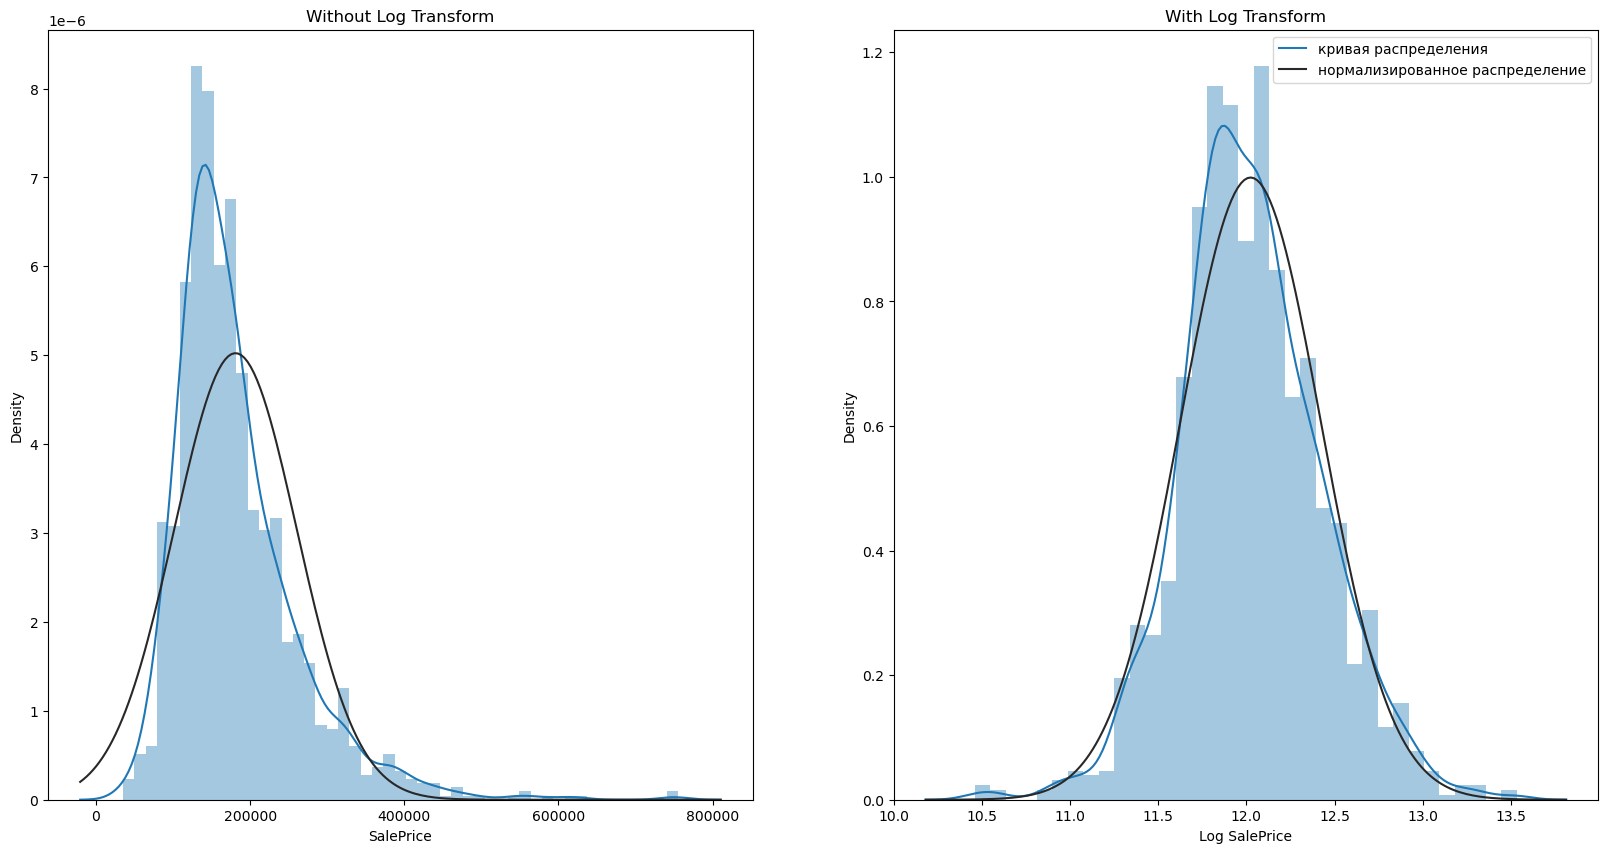

In [94]:
#визуализация того как повлияет трансформация(станет лучше)
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.legend(labels=['кривая распределения','нормализированное распределение'])
plt.show()

In [76]:
log_target = np.log(target)

## Модель

In [85]:
train_final = train_data3.loc[:train_data.index.max(), :].copy()
test_final = train_data3.loc[train_data.index.max() + 1:, :].reset_index(drop=True).copy()


In [86]:
#Ничего не потерялось и правильно разделилось
#train_final.shape
test_final.shape

(1459, 306)

In [81]:
baseline_model = CatBoostRegressor(verbose = 0)

In [82]:
baseline_model.fit(train_final, log_target)

In [83]:
kf = KFold(n_splits=10)
results = cross_val_score(baseline_model,train_final, log_target, scoring = 'neg_mean_squared_error', cv=kf)
results

array([-0.01324804, -0.00836343, -0.01042717, -0.02357506, -0.02053889,
       -0.01107006, -0.01396243, -0.00939808, -0.01528056, -0.01717739])

In [87]:
final_predictions = np.exp(baseline_model.predict(test_final))

In [88]:
submission = pd.concat([test_ids, pd.Series(predictions, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,124376.167033
1,1462,156972.385552
2,1463,192264.783395
3,1464,194731.829377
4,1465,186338.475246
...,...,...
1454,2915,89860.878177
1455,2916,85379.084101
1456,2917,158431.426435
1457,2918,117540.576089


In [89]:
submission.to_csv('D:/Документы/Python/ML/трен/house-prices-advanced-regression-techniques/submission.csv', index=False, header=True)